## Josepshon Junction array

With QuLTRA, it is possible to simulate an array of N Josephson junctions without introducing N separate nodes into the circuit, which would slow down the computational process. It is sufficient to instantiate a single J component in the circuit and specify the number of series-connected JJs to include.

In this simple example, we progressively increase the number of junctions in a qubit to show that its anharmonicity is proportional to $\frac{1}{N^2}$

In [3]:
import qultra as qu
import numpy as np

Cj=90e-15 #qubit capacitance
Lj=8e-9 #qubit inductance

N=np.arange(1, 21) #number of Josepshon junctions
alpha=[]

for n_junct in N:
    net=[qu.C(0,1,Cj),qu.J(0,1,Lj,n_junct)]
    circuit=qu.QCircuit(net,4,6)
    cross_kerr_matrix=circuit.run_epr()
    alpha.append(cross_kerr_matrix[0,0])

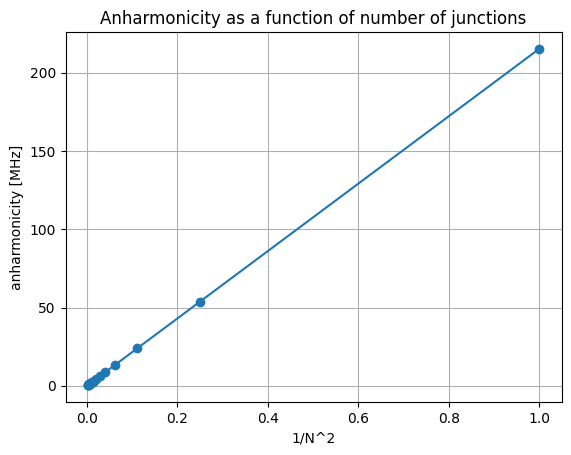

In [4]:
import matplotlib.pyplot as plt


plt.plot(1/N**2, alpha, marker='o')
plt.xlabel('1/N^2')
plt.ylabel('anharmonicity [MHz]')
plt.title('Anharmonicity as a function of number of junctions')
plt.grid(True)
plt.show()